<img src = "https://drive.google.com/uc?export=view&id=1XCFjEoG1OLaFbuntEH_PC7vtsII9wNfh" alt = "Encabezado MLDS" width = "100%">  </img>

In [ ]:
!pip install gdown

In [ ]:
import gdown
import os

In [ ]:
file_id = "1zomh0RsLehw1S0ndaFJ5cjigHSEGh0rf"
output_path = "/content/image.jpg"
gdown.download(f"https://drive.google.com/uc?id={file_id}", output_path, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1zomh0RsLehw1S0ndaFJ5cjigHSEGh0rf
To: /content/image.jpg
100%|██████████| 171k/171k [00:00<00:00, 42.3MB/s]


'/content/image.jpg'

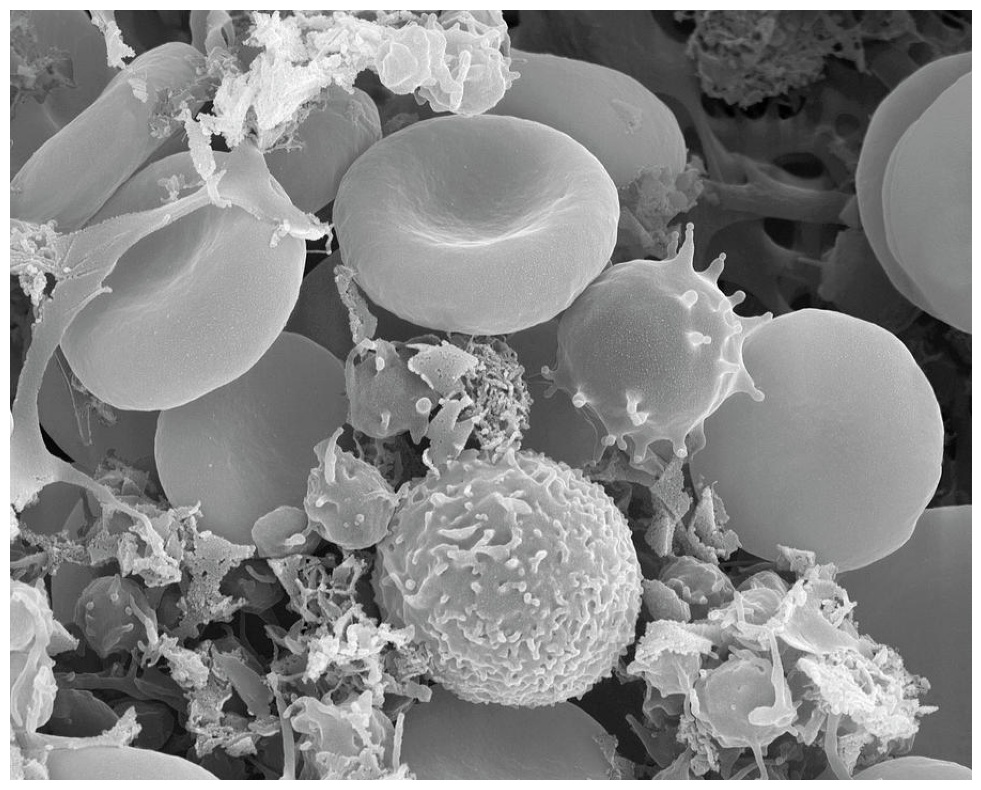

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image
image = Image.open(output_path)

# Display the image
plt.figure(figsize=(20, 10))
plt.imshow(image)
plt.axis('off')  # Turn off the axis
plt.show()

Import the needed libraries:

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os, random

plt.style.use("ggplot")
# Seleccionamos una semilla para los RNG
tf.random.set_seed(0)
np.random.seed(0)

#**Applied Project (MLDS-5): An Automated White Blood Cells Classification Using Transfer Learning and Fine tuning Techniques**
---

# **Design and Experimental Implementation**
---


## **1. Data Preparation - Data Partitioning**
---


In [ ]:
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Define the path and split the data into training and validation split

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/gdrive/MyDrive/Colab Notebooks/MLDS - UNAL/Deep Learning (MLDS 5)/Applied Project/Data/WBC_Data")

ds_train = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/gdrive/MyDrive/Colab Notebooks/MLDS - UNAL/Deep Learning (MLDS 5)/Applied Project/Data/WBC_Data/Train",
    validation_split = 0.2,
    subset = "validation",
    seed = 123)

ds_test_A = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/gdrive/MyDrive/Colab Notebooks/MLDS - UNAL/Deep Learning (MLDS 5)/Applied Project/Data/WBC_Data/Test-A")

ds_test_B = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/gdrive/MyDrive/Colab Notebooks/MLDS - UNAL/Deep Learning (MLDS 5)/Applied Project/Data/WBC_Data/Test-B")

ds_validation = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/gdrive/MyDrive/Colab Notebooks/MLDS - UNAL/Deep Learning (MLDS 5)/Applied Project/Data/WBC_Data/Train",
    validation_split = 0.2,
    subset="validation",
    seed = 123)


Found 16633 files belonging to 3 classes.
Found 10175 files belonging to 5 classes.
Using 2035 files for validation.
Found 4339 files belonging to 5 classes.
Found 2119 files belonging to 2 classes.
Found 10175 files belonging to 5 classes.
Using 2035 files for validation.


In [ ]:
import os
import os.path

We define the following function to evaluate the labels distribution in the train and validation datasets:

In [ ]:
def label_dist(file_path):
  # Initialize an empty dictionary to store the label counts
  label_counts = {}
  for dirpath, dirnames, filenames in os.walk(file_path):
    label = os.path.basename(dirpath)

    if label == os.path.basename(file_path):
      continue
    # count the number of files in the current subdirectory
    num_files = len(filenames)
    # update the label counts in the dictionary
    label_counts[label] = num_files

  return label_counts

In [ ]:
# TEST CELL
train_path = "/content/gdrive/MyDrive/Colab Notebooks/MLDS - UNAL/Deep Learning (MLDS 5)/Applied Project/Data/WBC_Data/Train"
label_distribution = label_dist(train_path)

# Print label distribution
for label, count in label_distribution.items():
  print(f'{label}: {count} images')


Basophil: 212 images
Eosinophil: 744 images
Monocyte: 561 images
Lymphocyte: 2427 images
Neutrophil: 6231 images


Check the labels from each set of images, **Train, Test-A, and Test-B**, respectively:

In [ ]:
import tensorflow_datasets as tfds

batch_size = 32
dataset_name = ds_train
class_names = ds_train.class_names

dataset_name_val_A = ds_test_A
class_names_A = ds_test_A.class_names

dataset_name_val_B = ds_test_B
class_names_B = ds_test_B.class_names

dataset_name_val = ds_validation
class_names_val = ds_validation.class_names

print(f'Labels in Train directory: {class_names}')
print(f'Labels in Test-A directory: {class_names_A}')
print(f'Labels in Test-A directory: {class_names_B}')
print(f'Labels in Validation directory: {class_names_val}')

Labels in Train directory: ['Basophil', 'Eosinophil', 'Lymphocyte', 'Monocyte', 'Neutrophil']
Labels in Test-A directory: ['Basophil', 'Eosinophil', 'Lymphocyte', 'Monocyte', 'Neutrophil']
Labels in Test-A directory: ['Lymphocyte', 'Neutrophil']
Labels in Validation directory: ['Basophil', 'Eosinophil', 'Lymphocyte', 'Monocyte', 'Neutrophil']


**File Paths:**

In [ ]:
train_path = "/content/gdrive/MyDrive/Colab Notebooks/MLDS - UNAL/Deep Learning (MLDS 5)/Applied Project/Data/WBC_Data/Train"
test_A_path = "/content/gdrive/MyDrive/Colab Notebooks/MLDS - UNAL/Deep Learning (MLDS 5)/Applied Project/Data/WBC_Data/Test-A"
test_B_path = "/content/gdrive/MyDrive/Colab Notebooks/MLDS - UNAL/Deep Learning (MLDS 5)/Applied Project/Data/WBC_Data/Test-B"

We examine the label distribution within the train dataset:

In [ ]:
# TEST CELL
#val_path = "/content/gdrive/MyDrive/Colab Notebooks/MLDS - UNAL/Deep Learning (MLDS 5)/Applied Project/Data/WBC_Data/Train"

label_distribution_train = label_dist(train_path)

# Print label distribution
for label, count in label_distribution_train.items():
  print(f'{label}: {count} images')

Basophil: 212 images
Eosinophil: 744 images
Monocyte: 561 images
Lymphocyte: 2427 images
Neutrophil: 6231 images


Define a function `def resize` to resize the images:

In [ ]:
def resize(dataset):
  size = (224, 224)
  ds_resized = dataset.map(lambda image, label: (tf.image.resize(image, size), label))

  return ds_resized

In [ ]:
#TEST CELL - Resize train and validation datasets
ds_train = resize(ds_train)
ds_validation = resize(ds_validation)
ds_test_A = resize(ds_test_A)
ds_test_B = resize(ds_test_B)

###**1.1 Data Augmentation**
---

Create an object **generator** using the `ImageDataGenerator`function:

In [ ]:
#from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.utils import shuffle
from tensorflow import keras


batch_size = 32
image_size = (224, 224)

train_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,
                                                                  width_shift_range = 0.05,
                                                                  height_shift_range = 0.05,
                                                                  horizontal_flip = True,
                                                                  vertical_flip = True,
                                                                  validation_split = 0.2)

#we do not apply the same augmentation process to both validation and test subsets.

val_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,
                                                                validation_split = 0.2)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

train_aug = train_generator.flow_from_directory(directory = train_path,
                                         subset = 'training',
                                         batch_size = batch_size,
                                         shuffle = True,
                                         class_mode = 'categorical',
                                         target_size = image_size)

val_aug = val_generator.flow_from_directory(directory = train_path,
                                         subset = 'validation',
                                         batch_size = batch_size,
                                         shuffle = True,
                                         class_mode = 'categorical',
                                         target_size = image_size)

test_A_aug = test_generator.flow_from_directory(directory = test_A_path,
                                         batch_size = batch_size,
                                         shuffle = False,
                                         class_mode = 'categorical',
                                         target_size = image_size)

test_B_aug = test_generator.flow_from_directory(directory = test_B_path,
                                         batch_size = batch_size,
                                         shuffle = False,
                                         class_mode = 'categorical',
                                         target_size = image_size)

Found 8142 images belonging to 5 classes.
Found 2033 images belonging to 5 classes.
Found 4339 images belonging to 5 classes.
Found 2119 images belonging to 2 classes.


###**1.2 Visualize Data**
---
Visualize some examples from the dataset:

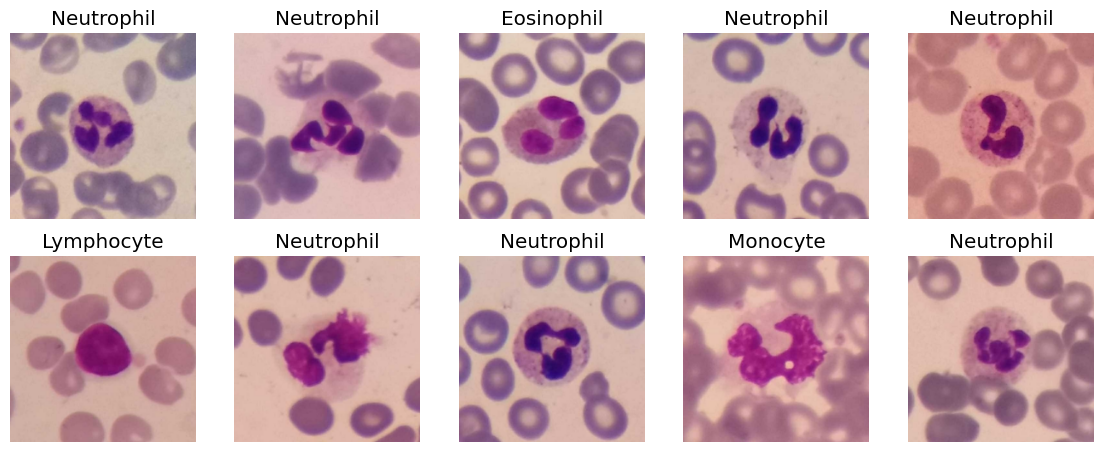

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (14, 14))
for images, labels in ds_train.take(1):
  for i in range(10):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis('off')

## **2. Model Selection and Design**
---


The applied project is focused on image classification, which enable us to implement pre-trained convolutional neural networks (CNN), and then, evaluate its performance by conducting distinct approaches, such as transfer learning and fine tuning techniques.

Initially, we will implement the [*ResNet50V2*](https://keras.io/api/applications/resnet/#resnet50v2-function) model - using both **Transfer Learning and Fine Tuning** techniques - because it is a relatively lightweight and efficient model that can be a good choice for *hematological* image classification tasks. Furthermore, it is a good choice when limited computational resources are available. Finally, after careful documentation, the present model seems to maintain a balance between accuracy performance and the total number of parameters included within the algorithm.

## **3. Model Implementation**
---


###**3.1 Define the Model**
We define the feature extractor layers from [*Keras applications*](https://keras.io/api/applications/) plus the EfficientNetB4-based model for image classification with 5 categories:

In [1]:
def pretrained_model(train_base_model, units, dropout):
  # Fix a seed for reproductibility purposes
  np.random.seed(0)
  tf.keras.utils.set_random_seed(0)
  # Define the EfficientNetB4 model
  extractor = tf.keras.applications.ResNet50V2(weights = 'imagenet',
                                                 include_top = False,
                                                 input_shape = (224, 224, 3))

  #Define whether we freeze the extractor model or not
  for layer in extractor.layers:
    layer.trainable = train_base_model

  # create a pooling layer to consolidate the feature maps extracted from
  # the extractor layer
  pool = tf.keras.layers.GlobalAveragePooling2D()(extractor.output)
  # add a dense layer
  dense = tf.keras.layers.Dense(units = units, activation = 'relu')(pool)
  # add a dropout layer for regularization
  drop = tf.keras.layers.Dropout(dropout)(dense)
  # output layer with the corresponding number of categories (units = 5) and softmax activation
  output = tf.keras.layers.Dense(units = 5, activation = 'softmax')(drop)
  # Transfer Learning Model
  model = tf.keras.models.Model(inputs = [extractor.input], outputs = [output])
  return model


In [ ]:
#Model Summary
model = pretrained_model(train_base_model = False,
                         units = 64,
                         dropout = 0.2)
model.summary()

94668760/94668760 [==============================] - 5s 0us/step
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_5[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 114, 114, 64)         0         ['conv1_conv[0][0]']          
                           

###**3.2 Compile the Model**
---

Define the `compile_model` function:
  

In [ ]:
from keras.src.backend import categorical_crossentropy

def compile_model(model, l_r, metrics):

  # Fix a seed for reproductibility purposes
  np.random.seed(0)
  tf.keras.utils.set_random_seed(0)

  #opt = tf.optimizers.Adam(larning_rate = l_r)

  model.compile(loss = 'categorical_crossentropy',
                optimizer  = tf.optimizers.Adam(learning_rate = l_r),
                metrics = metrics)

  return model

In [ ]:
# Compile the Model

model = compile_model(model = model,
                      l_r = 1e-3,
                      metrics = ['accuracy'])

model.get_compile_config()

{'optimizer': {'module': 'keras.optimizers',
  'class_name': 'Adam',
  'config': {'name': 'Adam',
   'weight_decay': None,
   'clipnorm': None,
   'global_clipnorm': None,
   'clipvalue': None,
   'use_ema': False,
   'ema_momentum': 0.99,
   'ema_overwrite_frequency': None,
   'jit_compile': True,
   'is_legacy_optimizer': False,
   'learning_rate': 0.0010000000474974513,
   'beta_1': 0.9,
   'beta_2': 0.999,
   'epsilon': 1e-07,
   'amsgrad': False},
  'registered_name': None},
 'loss': 'categorical_crossentropy',
 'metrics': ['accuracy'],
 'loss_weights': None,
 'weighted_metrics': None,
 'run_eagerly': None,
 'steps_per_execution': None,
 'jit_compile': None}

###**3.3 Train the Model**
---

Define the training function model - `train_model`:

In [ ]:
def train_model(model, train_aug, val_aug, epochs, weights):

  # Fix a seed for reproductibility purposes
  np.random.seed(0)
  tf.keras.utils.set_random_seed(0)

  best_callback = tf.keras.callbacks.ModelCheckpoint(filepath = weights,
                                                     monitor = 'val_loss',
                                                     verbose = True,
                                                     save_best_only = True,
                                                     save_weights_only = True,
                                                     mode = 'min')

  early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                                    min_delta = 0.001,
                                                    patience = 3,
                                                    mode = 'min',
                                                    restore_best_weights = True,
                                                    verbose = 1)

  history = model.fit(x = train_aug,
                      validation_data = val_aug,
                      steps_per_epoch = len(train_aug),
                      validation_steps = len(val_aug),
                      epochs = epochs,
                      callbacks = [best_callback, early_stopping],
                      verbose = 1)

  return model, history

Train the previously defined model (`ResNet50V2`)

**Estimated Time**: 45 mins (GPU)

In [ ]:
# TEST CELL
model = pretrained_model(train_base_model=False,
                              units = 64,
                              dropout = 0.2)

model = compile_model(model = model,
                          l_r = 1e-3,
                          metrics = ['accuracy'])

model_tr, history = train_model(model = model,
                                train_aug = train_aug,
                                val_aug = val_aug,
                                epochs = 15,
                                weights='transfer_learning.h5')

Epoch 1/15
255/255 [==============================] - ETA: 0s - loss: 0.4879 - accuracy: 0.8370
Epoch 1: val_loss improved from inf to 0.60046, saving model to transfer_learning.h5
255/255 [==============================] - 2121s 8s/step - loss: 0.4879 - accuracy: 0.8370 - val_loss: 0.6005 - val_accuracy: 0.7949
Epoch 2/15
255/255 [==============================] - ETA: 0s - loss: 0.2648 - accuracy: 0.9149
Epoch 2: val_loss improved from 0.60046 to 0.52407, saving model to transfer_learning.h5
255/255 [==============================] - 177s 696ms/step - loss: 0.2648 - accuracy: 0.9149 - val_loss: 0.5241 - val_accuracy: 0.8180
Epoch 3/15
255/255 [==============================] - ETA: 0s - loss: 0.2101 - accuracy: 0.9295
Epoch 3: val_loss did not improve from 0.52407
255/255 [==============================] - 134s 524ms/step - loss: 0.2101 - accuracy: 0.9295 - val_loss: 0.5303 - val_accuracy: 0.8205
Epoch 4/15
255/255 [==============================] - ETA: 0s - loss: 0.1889 - accuracy:

###**3.4 Learning Curves**
---

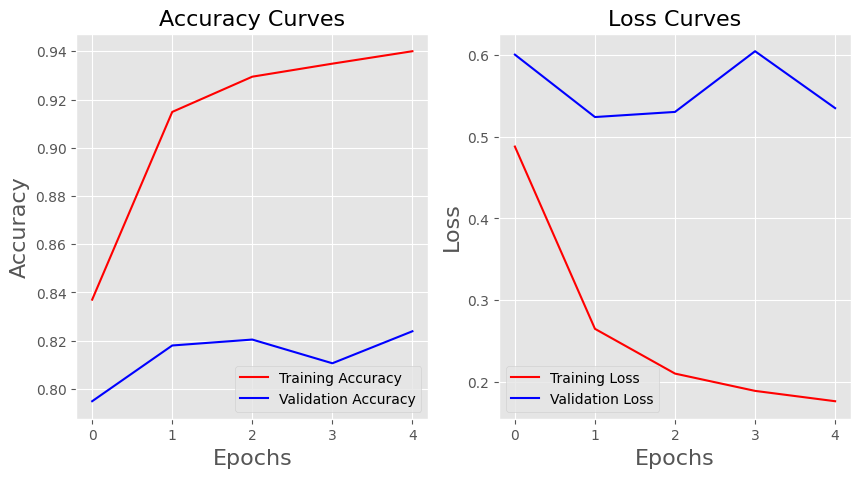

In [ ]:
# Accuracy Plot Curves
plt.figure(figsize = [10, 5])
plt.subplot(121)
plt.plot(history.history['accuracy'], 'r', linewidth = 1.5)
plt.plot(history.history['val_accuracy'], 'b', linewidth = 1.5)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize = 10)
plt.xlabel('Epochs', fontsize = 16)
plt.ylabel('Accuracy', fontsize = 16)
plt.title('Accuracy Curves', fontsize = 16)
plt.subplot(122)
plt.plot(history.history['loss'], 'r', linewidth = 1.5)
plt.plot(history.history['val_loss'], 'b', linewidth = 1.5)
plt.legend(['Training Loss', 'Validation Loss'], fontsize = 10)
plt.xlabel('Epochs', fontsize = 16)
plt.ylabel('Loss', fontsize = 16)
plt.title('Loss Curves', fontsize = 16)
plt.show();

###**3.5 Evaluation Metrics**
---

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

predicted_classes = np.argmax(model.predict(test_A_aug), axis = 1)
#confusionmatrix = confusion_matrix(test_A_aug.classes, predicted_classes)
print(classification_report(test_A_aug.classes, predicted_classes))


136/136 [==============================] - 3096s 23s/step
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        89
           1       0.67      0.75      0.70       322
           2       0.89      0.94      0.91      1034
           3       0.79      0.71      0.75       234
           4       0.96      0.93      0.94      2660

    accuracy                           0.91      4339
   macro avg       0.86      0.86      0.86      4339
weighted avg       0.91      0.91      0.91      4339



###**3.6 Testing Loss and Accuracy**
---

Test the implemented model:

In [ ]:
loss, acc = model.evaluate(test_A_aug)

136/136 [==============================] - 21s 150ms/step - loss: 0.2641 - accuracy: 0.9083


###**3.7 Fine tuning**
---
Now, we implement a fine tuning technique to evaluate whether the model's performance can be improved or not. By changing the *learning rate* to $10^{-5}$ and we train the *extractor layer* (`ResNet50V2`).  

In [ ]:
model_ft = pretrained_model(train_base_model = True,
                              units = 64,
                              dropout = 0.2)

model_ft = compile_model(model = model_ft,
                          l_r = 1e-5,
                          metrics = ['accuracy'])

model_tr, history = train_model(model = model_ft,
                                train_aug = train_aug,
                                val_aug = val_aug,
                                epochs = 15,
                                weights='fine_tuning.h5')

In [ ]:
# Load the best model
ft_model.load_weights("fine_tuning.h5")
print(classification_report(test_A_aug, np.argmax(ft_model.predict(val_aug_prep,
                                                              batch_size=32),axis=1)))

#**References**
---

1. https://www.linkedin.com/pulse/python-calculates-total-size-directory-its-techwith-julles/

2. AL-Dulaimi, K., Banks, J., Chandran, V.,Tomeo-Reyes, I., & Nguyen, K. (2018). Classification of White Blood Cell Types from Microscope Images: Techniques and Challenges, 1–23. Retrieved from https://eprints.qut.edu.au/121783/

3. https://www.kaggle.com/datasets/masoudnickparvar/white-blood-cells-dataset/data

4. https://www.youtube.com/watch?v=CMu25mtyl-s&t=397s

# **Créditos**
---

* **Profesor:** [Fabio Augusto Gonzalez](https://dis.unal.edu.co/~fgonza/)
* **Asistentes docentes :**
  * [Santiago Toledo Cortés](https://sites.google.com/unal.edu.co/santiagotoledo-cortes/)
* **Diseño de imágenes:**
    - [Mario Andres Rodriguez Triana](mailto:mrodrigueztr@unal.edu.co).
* **Coordinador de virtualización:**
    - [Edder Hernández Forero](https://www.linkedin.com/in/edder-hernandez-forero-28aa8b207/).

**Universidad Nacional de Colombia** - *Facultad de Ingeniería*